**Menggambarkan persamaan bidang dalam 3D**

Persamaan sistem linier

Sistem linier adalah sekumpulan persamaan linier yang terdiri dari dua atau lebih variabel yang mungkin memiliki banyak solusi, satu solusi, atau tidak memiliki solusi sama sekali.

Penyelesaian sistem persamaan linier menggunakan eliminasi gauss

Selesaikan persamaan berikut:
$$
8x_1+9x_2+x_3=19\\
x_1+2x_2+3x_3=9\\
2x_1+x_2+x_3=5
$$

Berikut penyelesaian di atas

In [1]:
import numpy as np
A=np.array([[8,9,1,19],[1,2,3,9],[2,1,1,5]])
print(A)

[[ 8  9  1 19]
 [ 1  2  3  9]
 [ 2  1  1  5]]


###Mendefinisikan fungsi operasi baris eliminasi GAUSS



*   RowSwap()
    adalah pertukaran (swap) baris dalam sebuah matriks. RowSwap digunakan untuk melakukan operasi pengubahan atau pengolahan data pada matriks.
*   RowScale()
    adalah operasi untuk mengalikan setiap elemen dalam sebuah baris matriks dengan suatu skalar tertentu sehingga dapat melakukan transformasi pada matriks.
*   RowAdd()
    adalah operasi pada matriks, indeks baris A (hasil penambahan akan ditempatkan), indeks baris B (yang akan ditambahkan ke baris A), dan opsional skala (sebagai faktor untuk mengalikan baris B sebelum menambahkannya). Fungsi tersebut kemudian menambahkan baris B (setelah dikalikan dengan skala jika diberikan) ke baris A, menghasilkan matriks baru dengan baris yang telah diubah.





In [2]:
def RowSwap(A,k,l):
# =============================================================================
#     A is a NumPy array.  RowSwap will return duplicate array with rows
#     k and l swapped.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        temp = B[k][j]
        B[k][j] = B[l][j]
        B[l][j] = temp

    return B

def RowScale(A,k,scale):
# =============================================================================
#     A is a NumPy array.  RowScale will return duplicate array with the
#     entries of row k multiplied by scale.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        B[k][j] *= scale

    return B

def RowAdd(A,k,l,scale):
# =============================================================================
#     A is a numpy array.  RowAdd will return duplicate array with row
#     l modifed.  The new values will be the old values of row l added to
#     the values of row k, multiplied by scale.
# =============================================================================
    m = A.shape[0]  # m is number of rows in A
    n = A.shape[1]  # n is number of columns in A

    B = np.copy(A).astype('float64')

    for j in range(n):
        B[l][j] += B[k][j]*scale

    return B

Tahapan penyelesaian dengan menggunakan eliminasi gauss

In [ ]:
A1 = RowSwap(A,0,1)
print(A1,"\n")

A2 = RowAdd(A1,0,1,-8)
print(A2,"\n")

A3 = RowAdd(A2,0,2,-2)
print(A3,"\n")

A4= RowAdd(A3,2,1,-2)
print(A4,"\n")

A5 = RowScale(A4,1,-1)
print(A5,"\n")

A6 = RowAdd(A5,1,2,3)
print(A6,"\n")

A7 = RowScale(A6,2,1/34)
print(A7,"\n")

[[ 1.  2.  3.  9.]
 [ 8.  9.  1. 19.]
 [ 2.  1.  1.  5.]] 

[[  1.   2.   3.   9.]
 [  0.  -7. -23. -53.]
 [  2.   1.   1.   5.]] 

[[  1.   2.   3.   9.]
 [  0.  -7. -23. -53.]
 [  0.  -3.  -5. -13.]] 

[[  1.   2.   3.   9.]
 [  0.  -1. -13. -27.]
 [  0.  -3.  -5. -13.]] 

[[  1.   2.   3.   9.]
 [ -0.   1.  13.  27.]
 [  0.  -3.  -5. -13.]] 

[[ 1.  2.  3.  9.]
 [-0.  1. 13. 27.]
 [ 0.  0. 34. 68.]] 

[[ 1.  2.  3.  9.]
 [-0.  1. 13. 27.]
 [ 0.  0.  1.  2.]] 



Persamaanya adalah
$$
x_1+2x_2+3x_3=9\\
x_2+13x_3=27\\
x_3=2\\
$$
Sehingga diperoleh:

In [ ]:
x3 = 2
print ('x3 =' ,x3)
x2 = 27 -  (13*x3)
print('x2 =',round(x2))
x1=9 - 2*x2 - 3 *x3
print('x1 =',round(x1))b

x3 = 2
x2 = 1
x1 = 1


Atau dapat dituliskan seperti berikut:

In [ ]:
b=np.array([[1,0,0,1],[0,1,0,1],[0,0,1,2]])
print(b)

[[1 0 0 1]
 [0 1 0 1]
 [0 0 1 2]]


Jawaban dari segitiga atas, sehingga diperoleh:

x1 = 1

x2 = 1

x3 = 2

Sebagai pembuktian ambil satu contoh:

x + 2x + 3x = 9

1 + 2.(1) + 3.(2) = 9

9 = 9

Implementasi dengan kurva bidang

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Koefisien untuk masing-masing persamaan bidang
a1, b1, c1, r1 = 1, 2, 3, 9
a2, b2, c2, r2 = 0, 1, 13, 27
a3, b3, c3, r3 = 0, 0, 1, 2
# a1, b1, c1, r1 = 8, 9, 1, 19
# a2, b2, c2, r2 = 1, 2, 3, 9
# a3, b3, c3, r3 = 2, 1, 1, 5

# Buat data x, y
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Buat grid x, y
X, Y = np.meshgrid(x, y)

# Hitung nilai z sesuai dengan persamaan bidang
Z1 = (r1 - a1*X - b1*Y) / c1
Z2 = (r2 - a2*X - b2*Y) / c2
Z3 = (r3 - a3*X - b3*Y) / c3
# print(Z1)
# print(Z2)
# print(Z3)

# Plot persamaan bidang dalam tiga dimensi
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot bidang
ax.plot_surface(X, Y, Z1, alpha=0.5, rstride=100, cstride=100, color='r')
ax.plot_surface(X, Y, Z2, alpha=0.5, rstride=100, cstride=100, color='g')
ax.plot_surface(X, Y, Z3, alpha=0.5, rstride=100, cstride=100, color='b')

# Titik perpotongan
A = np.array([[a1, b1, c1], [a2, b2, c2], [a3, b3, c3]])
B = np.array([r1, r2, r3])
intersect = np.linalg.solve(A, B)
ax.scatter(intersect[0], intersect[1], intersect[2], color='black', s=100, label='Titik Perpotongan')

# Label sumbu
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Tampilkan legenda
ax.legend()

# Tampilkan plot
plt.show()

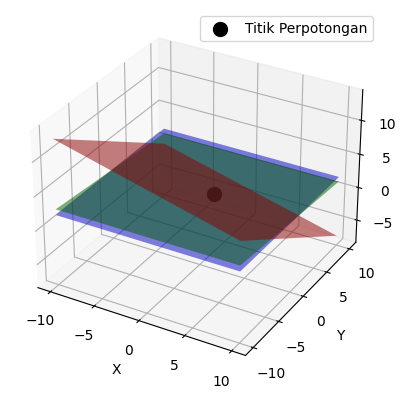

Berikut gambar 3D dari persamaan diatas:

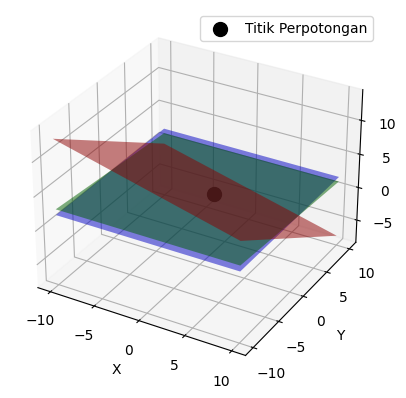

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Koefisien untuk masing-masing persamaan bidang
a1, b1, c1, r1 = 1, 2, 3, 9
a2, b2, c2, r2 = 0, 1, 13, 27
a3, b3, c3, r3 = 0, 0, 1, 2

# Buat data x, y
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Buat grid x, y
X, Y = np.meshgrid(x, y)

# Hitung nilai z sesuai dengan persamaan bidang
Z1 = (r1 - a1*X - b1*Y) / c1
Z2 = (r2 - a2*X - b2*Y) / c2
Z3 = (r3 - a3*X - b3*Y) / c3

# Plot persamaan bidang dalam tiga dimensi
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot bidang
ax.plot_surface(X, Y, Z1, alpha=0.5, rstride=100, cstride=100, color='r')
ax.plot_surface(X, Y, Z2, alpha=0.5, rstride=100, cstride=100, color='g')
ax.plot_surface(X, Y, Z3, alpha=0.5, rstride=100, cstride=100, color='b')

# Titik perpotongan
A = np.array([[a1, b1, c1], [a2, b2, c2], [a3, b3, c3]])
B = np.array([r1, r2, r3])
intersect = np.linalg.solve(A, B)
ax.scatter(intersect[0], intersect[1], intersect[2], color='black', s=100, label='Titik Perpotongan')

# Label sumbu
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Tampilkan legenda
ax.legend()

# Tampilkan plot
plt.show()
